 **Importing Libraries**

In [83]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import seaborn as sns

**Updating Datasets**

In [84]:
country = pd.read_csv('Metadata_Country.csv')
population = pd.read_csv('country_population.csv')
fertility_rate = pd.read_csv('fertility_rate.csv')
life_expectency = pd.read_csv('life_expectancy.csv')
metadata =  pd.read_csv('Metadata_Country.csv')

**Cleaning data**

---


*Handling Missing Missing Values*

*I have checked for the missing values as there are plenty of missing values present for each year, so I handled it by taking the mean of the other values and applying it to the missing ones.*

In [85]:
country.head()

Country Code                     Region          IncomeGroup  \
0          ABW  Latin America & Caribbean          High income   
1          AFG                 South Asia           Low income   
2          AGO         Sub-Saharan Africa  Lower middle income   
3          ALB      Europe & Central Asia  Upper middle income   
4          AND      Europe & Central Asia          High income   

                                        SpecialNotes    TableName  Unnamed: 5  
0  SNA data for 2000-2011 are updated from offici...        Aruba         NaN  
1  Fiscal year end: March 20; reporting period fo...  Afghanistan         NaN  
2                                                NaN       Angola         NaN  
3                                                NaN      Albania         NaN  
4  WB-3 code changed from ADO to AND to align wit...      Andorra         NaN

In [86]:
# Keeping only necessery columns.
country = country[['Country Code','Region']]
country

Country Code                      Region
0            ABW   Latin America & Caribbean
1            AFG                  South Asia
2            AGO          Sub-Saharan Africa
3            ALB       Europe & Central Asia
4            AND       Europe & Central Asia
..           ...                         ...
258          XKX       Europe & Central Asia
259          YEM  Middle East & North Africa
260          ZAF          Sub-Saharan Africa
261          ZMB          Sub-Saharan Africa
262          ZWE          Sub-Saharan Africa

[263 rows x 2 columns]

from matplotlib import pyplot as plt
import seaborn as sns
country.groupby('Region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [88]:
# Finding the null values in the dataset
country.isna().sum()

Country Code     0
Region          46
dtype: int64

In [89]:
# Rows and Columns in dataset
country.shape

(263, 2)

In [90]:
population.head()

Country Name Country Code     Indicator Name Indicator Code       1960  \
0        Aruba          ABW  Population, total    SP.POP.TOTL    54211.0   
1  Afghanistan          AFG  Population, total    SP.POP.TOTL  8996351.0   
2       Angola          AGO  Population, total    SP.POP.TOTL  5643182.0   
3      Albania          ALB  Population, total    SP.POP.TOTL  1608800.0   
4      Andorra          AND  Population, total    SP.POP.TOTL    13411.0   

        1961       1962       1963       1964       1965  ...        2007  \
0    55438.0    56225.0    56695.0    57032.0    57360.0  ...    101220.0   
1  9166764.0  9345868.0  9533954.0  9731361.0  9938414.0  ...  26616792.0   
2  5753024.0  5866061.0  5980417.0  6093321.0  6203299.0  ...  20997687.0   
3  1659800.0  1711319.0  1762621.0  1814135.0  1864791.0  ...   2970017.0   
4    14375.0    15370.0    16412.0    17469.0    18549.0  ...     82683.0   

         2008        2009        2010        2011        2012        2013  \
0    101353.0    101453.0    101669.0    102053.0    102577.0    103187.0   
1  27294031.0  28004331.0  28803167.0  29708599.0  30696958.0  31731688.0   
2  21759420.0  22549547.0  23369131.0  24218565.0  25096150.0  25998340.0   
3   2947314.0   2927519.0   2913021.0   2905195.0   2900401.0   2895092.0   
4     83861.0     84462.0     84449.0     83751.0     82431.0     80788.0   

         2014        2015        2016  
0    103795.0    104341.0    104822.0  
1  32758020.0  33736494.0  34656032.0  
2  26920466.0  27859305.0  28813463.0  
3   2889104.0   2880703.0   2876101.0  
4     79223.0     78014.0     77281.0  

[5 rows x 61 columns]

In [91]:
# Checking for null values in dataset.
population.isna().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              4
                 ..
2012              2
2013              2
2014              2
2015              2
2016              2
Length: 61, dtype: int64

In [92]:
# Dropping unnecessary columns from the dataset.
population.drop(['Country Name','Indicator Name','Indicator Code'],axis=1,inplace=True)  # axis=1 for column and axis=0 for row
population.head()

Country Code       1960       1961       1962       1963       1964  \
0          ABW    54211.0    55438.0    56225.0    56695.0    57032.0   
1          AFG  8996351.0  9166764.0  9345868.0  9533954.0  9731361.0   
2          AGO  5643182.0  5753024.0  5866061.0  5980417.0  6093321.0   
3          ALB  1608800.0  1659800.0  1711319.0  1762621.0  1814135.0   
4          AND    13411.0    14375.0    15370.0    16412.0    17469.0   

        1965        1966        1967        1968  ...        2007        2008  \
0    57360.0     57715.0     58055.0     58386.0  ...    101220.0    101353.0   
1  9938414.0  10152331.0  10372630.0  10604346.0  ...  26616792.0  27294031.0   
2  6203299.0   6309770.0   6414995.0   6523791.0  ...  20997687.0  21759420.0   
3  1864791.0   1914573.0   1965598.0   2022272.0  ...   2970017.0   2947314.0   
4    18549.0     19647.0     20758.0     21890.0  ...     82683.0     83861.0   

         2009        2010        2011        2012        2013        2014  \
0    101453.0    101669.0    102053.0    102577.0    103187.0    103795.0   
1  28004331.0  28803167.0  29708599.0  30696958.0  31731688.0  32758020.0   
2  22549547.0  23369131.0  24218565.0  25096150.0  25998340.0  26920466.0   
3   2927519.0   2913021.0   2905195.0   2900401.0   2895092.0   2889104.0   
4     84462.0     84449.0     83751.0     82431.0     80788.0     79223.0   

         2015        2016  
0    104341.0    104822.0  
1  33736494.0  34656032.0  
2  27859305.0  28813463.0  
3   2880703.0   2876101.0  
4     78014.0     77281.0  

[5 rows x 58 columns]

In [93]:
# All the columns in the population dataset.
population.columns

Index(['Country Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016'],
      dtype='object')

In [94]:
# Checking the rows and columns in the dataset.
population.shape

(264, 58)

In [95]:
# Dropping the NaN values in the dataset.
population.dropna(axis=0,inplace=True)

In [96]:
# Checking the rows and columns in the dataset.
population.shape

(258, 58)

In [97]:
# Creating the list for all the years in the dataset.
years = [str(i) for i in range(1960,2017)]
print(years)

['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']


In [98]:
# Melting the dataset.(unpivot the dataset)

population = pd.melt(population,
            id_vars='Country Code',
            value_vars=years,
            var_name='Year',
            value_name='Population')

In [99]:
# Checking the melted dataset.
population

Country Code  Year  Population
0              ABW  1960     54211.0
1              AFG  1960   8996351.0
2              AGO  1960   5643182.0
3              ALB  1960   1608800.0
4              AND  1960     13411.0
...            ...   ...         ...
14701          XKX  2016   1816200.0
14702          YEM  2016  27584213.0
14703          ZAF  2016  56015473.0
14704          ZMB  2016  16591390.0
14705          ZWE  2016  16150362.0

[14706 rows x 3 columns]

from matplotlib import pyplot as plt
population['Population'].plot(kind='hist', bins=20, title='Population')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Population']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = population.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Population')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = population.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
population['Population'].plot(kind='line', figsize=(8, 4), title='Population')
plt.gca().spines[['top', 'right']].set_visible(False)

In [101]:
# Merge the Country and Population dataset.

country_and_population_merge = pd.merge(country,population,how='left',on='Country Code')

In [102]:
# Checking the number of rows and columns in the merged dataset.
country_and_population_merge.shape

(14711, 4)

In [103]:
fertility_rate.head()

Country Name Country Code                            Indicator Name  \
0        Aruba          ABW  Fertility rate, total (births per woman)   
1  Afghanistan          AFG  Fertility rate, total (births per woman)   
2       Angola          AGO  Fertility rate, total (births per woman)   
3      Albania          ALB  Fertility rate, total (births per woman)   
4      Andorra          AND  Fertility rate, total (births per woman)   

   Indicator Code   1960   1961   1962   1963   1964   1965  ...   2007  \
0  SP.DYN.TFRT.IN  4.820  4.655  4.471  4.271  4.059  3.842  ...  1.763   
1  SP.DYN.TFRT.IN  7.450  7.450  7.450  7.450  7.450  7.450  ...  6.460   
2  SP.DYN.TFRT.IN  7.478  7.524  7.563  7.592  7.611  7.619  ...  6.368   
3  SP.DYN.TFRT.IN  6.489  6.401  6.282  6.133  5.960  5.773  ...  1.668   
4  SP.DYN.TFRT.IN    NaN    NaN    NaN    NaN    NaN    NaN  ...  1.180   

    2008   2009   2010   2011   2012   2013   2014   2015   2016  
0  1.764  1.769  1.776  1.783  1.791  1.796  1.800  1.801  1.800  
1  6.254  6.038  5.816  5.595  5.380  5.174  4.981  4.802  4.635  
2  6.307  6.238  6.162  6.082  6.000  5.920  5.841  5.766  5.694  
3  1.650  1.646  1.653  1.668  1.685  1.700  1.710  1.714  1.713  
4  1.250  1.190  1.270    NaN    NaN    NaN    NaN    NaN    NaN  

[5 rows x 61 columns]

In [104]:
fertility_rate.head()

Country Name Country Code                            Indicator Name  \
0        Aruba          ABW  Fertility rate, total (births per woman)   
1  Afghanistan          AFG  Fertility rate, total (births per woman)   
2       Angola          AGO  Fertility rate, total (births per woman)   
3      Albania          ALB  Fertility rate, total (births per woman)   
4      Andorra          AND  Fertility rate, total (births per woman)   

   Indicator Code   1960   1961   1962   1963   1964   1965  ...   2007  \
0  SP.DYN.TFRT.IN  4.820  4.655  4.471  4.271  4.059  3.842  ...  1.763   
1  SP.DYN.TFRT.IN  7.450  7.450  7.450  7.450  7.450  7.450  ...  6.460   
2  SP.DYN.TFRT.IN  7.478  7.524  7.563  7.592  7.611  7.619  ...  6.368   
3  SP.DYN.TFRT.IN  6.489  6.401  6.282  6.133  5.960  5.773  ...  1.668   
4  SP.DYN.TFRT.IN    NaN    NaN    NaN    NaN    NaN    NaN  ...  1.180   

    2008   2009   2010   2011   2012   2013   2014   2015   2016  
0  1.764  1.769  1.776  1.783  1.791  1.796  1.800  1.801  1.800  
1  6.254  6.038  5.816  5.595  5.380  5.174  4.981  4.802  4.635  
2  6.307  6.238  6.162  6.082  6.000  5.920  5.841  5.766  5.694  
3  1.650  1.646  1.653  1.668  1.685  1.700  1.710  1.714  1.713  
4  1.250  1.190  1.270    NaN    NaN    NaN    NaN    NaN    NaN  

[5 rows x 61 columns]

In [105]:
# Checking the null values in the dataset.
fertility_rate.isna().sum()

Country Name       0
Country Code       0
Indicator Name     0
Indicator Code     0
1960              28
                  ..
2012              16
2013              18
2014              18
2015              17
2016              18
Length: 61, dtype: int64

In [ ]:
# Dropping the unnecessary columns in the dataset.
fertility_rate.drop(['Country Name','Indicator Name','Indicator Code'],axis=1,inplace=True)
fertility_rate.head()

In [107]:
# Printing the all the columns in the dataset.
fertility_rate.columns

Index(['Country Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016'],
      dtype='object')

In [108]:
# Checking the number of rows and columns in the dataset.
fertility_rate.shape

(264, 58)

In [109]:
# Dropping the NaN values in the dataset.
fertility_rate.dropna(axis=0,inplace=True)

In [110]:
# Checking the number of rows and columns in the dataset after dropping the NaN values.
fertility_rate.shape

(235, 58)

In [111]:
# Creating a list for the years int the dataset.
fyears = [str(i) for i in range(1960,2017)]
print(fyears)

['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']


In [112]:
# Melting the dataset.
df = pd.melt(fertility_rate,
            id_vars='Country Code',
            value_vars=fyears,
            var_name='Year',
            value_name='Fertility')

In [113]:
df

Country Code  Year  Fertility
0              ABW  1960   4.820000
1              AFG  1960   7.450000
2              AGO  1960   7.478000
3              ALB  1960   6.489000
4              ARB  1960   6.948747
...            ...   ...        ...
13390          WSM  2016   3.976000
13391          YEM  2016   3.995000
13392          ZAF  2016   2.458000
13393          ZMB  2016   4.981000
13394          ZWE  2016   3.760000

[13395 rows x 3 columns]

from matplotlib import pyplot as plt
df['Fertility'].plot(kind='hist', bins=20, title='Fertility')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Fertility']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Fertility')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['Fertility'].plot(kind='line', figsize=(8, 4), title='Fertility')
plt.gca().spines[['top', 'right']].set_visible(False)

In [114]:
# merge the dataset with the previous dataset.
contry_and_population_merge_fertility = pd.merge(country_and_population_merge,df,how='left',on=['Country Code','Year'])

In [115]:
contry_and_population_merge_fertility.head()

Country Code                     Region  Year  Population  Fertility
0          ABW  Latin America & Caribbean  1960     54211.0      4.820
1          ABW  Latin America & Caribbean  1961     55438.0      4.655
2          ABW  Latin America & Caribbean  1962     56225.0      4.471
3          ABW  Latin America & Caribbean  1963     56695.0      4.271
4          ABW  Latin America & Caribbean  1964     57032.0      4.059

In [117]:
contry_and_population_merge_fertility.head()

Country Code                     Region  Year  Population  Fertility
0          ABW  Latin America & Caribbean  1960     54211.0      4.820
1          ABW  Latin America & Caribbean  1961     55438.0      4.655
2          ABW  Latin America & Caribbean  1962     56225.0      4.471
3          ABW  Latin America & Caribbean  1963     56695.0      4.271
4          ABW  Latin America & Caribbean  1964     57032.0      4.059

In [116]:
life_expectency.head()

Country Name Country Code                           Indicator Name  \
0        Aruba          ABW  Life expectancy at birth, total (years)   
1  Afghanistan          AFG  Life expectancy at birth, total (years)   
2       Angola          AGO  Life expectancy at birth, total (years)   
3      Albania          ALB  Life expectancy at birth, total (years)   
4      Andorra          AND  Life expectancy at birth, total (years)   

   Indicator Code    1960    1961    1962    1963    1964    1965  ...  \
0  SP.DYN.LE00.IN  65.662  66.074  66.444  66.787  67.113  67.435  ...   
1  SP.DYN.LE00.IN  32.292  32.742  33.185  33.624  34.060  34.495  ...   
2  SP.DYN.LE00.IN  33.251  33.573  33.914  34.272  34.645  35.031  ...   
3  SP.DYN.LE00.IN  62.279  63.298  64.187  64.911  65.461  65.848  ...   
4  SP.DYN.LE00.IN     NaN     NaN     NaN     NaN     NaN     NaN  ...   

     2007    2008    2009    2010    2011    2012    2013    2014    2015  \
0  74.576  74.725  74.872  75.016  75.158  75.299  75.440  75.582  75.725   
1  59.694  60.243  60.754  61.226  61.666  62.086  62.494  62.895  63.288   
2  55.096  56.189  57.231  58.192  59.042  59.770  60.373  60.858  61.241   
3  75.656  75.943  76.281  76.652  77.031  77.389  77.702  77.963  78.174   
4     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

     2016  
0  75.867  
1  63.673  
2  61.547  
3  78.345  
4     NaN  

[5 rows x 61 columns]

In [118]:
life_expectency.isna().sum()

Country Name       0
Country Code       0
Indicator Name     0
Indicator Code     0
1960              29
                  ..
2012              17
2013              19
2014              19
2015              20
2016              19
Length: 61, dtype: int64

In [119]:
# Checking the number of rows and columns in the dataset.
life_expectency.shape

(264, 61)

In [120]:
# Dropping the unnecessary columns in the dataset.
life_expectency.drop(['Country Name','Indicator Name','Indicator Code'],axis=1,inplace=True)
life_expectency.head()

Country Code    1960    1961    1962    1963    1964    1965    1966  \
0          ABW  65.662  66.074  66.444  66.787  67.113  67.435  67.762   
1          AFG  32.292  32.742  33.185  33.624  34.060  34.495  34.928   
2          AGO  33.251  33.573  33.914  34.272  34.645  35.031  35.426   
3          ALB  62.279  63.298  64.187  64.911  65.461  65.848  66.108   
4          AND     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

     1967    1968  ...    2007    2008    2009    2010    2011    2012  \
0  68.095  68.436  ...  74.576  74.725  74.872  75.016  75.158  75.299   
1  35.361  35.796  ...  59.694  60.243  60.754  61.226  61.666  62.086   
2  35.828  36.234  ...  55.096  56.189  57.231  58.192  59.042  59.770   
3  66.302  66.485  ...  75.656  75.943  76.281  76.652  77.031  77.389   
4     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   

     2013    2014    2015    2016  
0  75.440  75.582  75.725  75.867  
1  62.494  62.895  63.288  63.673  
2  60.373  60.858  61.241  61.547  
3  77.702  77.963  78.174  78.345  
4     NaN     NaN     NaN     NaN  

[5 rows x 58 columns]

In [121]:
# Printing all the columns in the dataset.
life_expectency.columns

Index(['Country Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016'],
      dtype='object')

In [122]:
# Dropping the NaN values in the dataset.
life_expectency.dropna(axis=0,inplace=True)

In [123]:
# Checking the number of rows and columns in the dataset after dropping NaN values.
life_expectency.shape

(235, 58)

In [124]:
# Creating list for the years in the dataset.
lyears = [str(i) for i in range(1960,2017)]
print(lyears)

['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']


In [125]:
# Melting the dataset.
df = pd.melt(life_expectency,
            id_vars='Country Code',
            value_vars=lyears,
            var_name='Year',
            value_name='Life Expectency')

In [126]:
df

Country Code  Year  Life Expectency
0              ABW  1960        65.662000
1              AFG  1960        32.292000
2              AGO  1960        33.251000
3              ALB  1960        62.279000
4              ARB  1960        46.825065
...            ...   ...              ...
13390          WSM  2016        75.013000
13391          YEM  2016        64.953000
13392          ZAF  2016        62.774000
13393          ZMB  2016        61.874000
13394          ZWE  2016        61.163000

[13395 rows x 3 columns]

from matplotlib import pyplot as plt
df['Life Expectency'].plot(kind='hist', bins=20, title='Life Expectency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Life Expectency']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Life Expectency')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['Life Expectency'].plot(kind='line', figsize=(8, 4), title='Life Expectency')
plt.gca().spines[['top', 'right']].set_visible(False)

In [127]:
# Merging and Creating a final dataset.
final_dataset = pd.merge(contry_and_population_merge_fertility,df,how='left',on=['Country Code','Year'])

In [128]:
final_dataset.head()

Country Code                     Region  Year  Population  Fertility  \
0          ABW  Latin America & Caribbean  1960     54211.0      4.820   
1          ABW  Latin America & Caribbean  1961     55438.0      4.655   
2          ABW  Latin America & Caribbean  1962     56225.0      4.471   
3          ABW  Latin America & Caribbean  1963     56695.0      4.271   
4          ABW  Latin America & Caribbean  1964     57032.0      4.059   

   Life Expectency  
0           65.662  
1           66.074  
2           66.444  
3           66.787  
4           67.113

In [129]:
# Finding the NaN values in the final dataset.
final_dataset.isna().sum()

Country Code          0
Region             2622
Year                  5
Population            5
Fertility          1430
Life Expectency    1430
dtype: int64

In [130]:
# Dropping the NaN values int the final dataset.
final_dataset.dropna(axis=0,inplace=True)

In [131]:
# Checking the number of rows and columns after dropping the NaN values in the dataset.
final_dataset.shape

(10602, 6)

In [132]:
import plotly.express as px

In [133]:
fig_fertility_vs_life_expectency = px.scatter(final_dataset,
           x="Fertility",
           y="Life Expectency",
           animation_frame="Year",
           animation_group="Country Code",
           size="Population",
           color="Region",
           hover_name="Country Code",
           size_max=50,
           title="Fertility Rate vs Life Expectancy",
           template="plotly_dark",
           range_x=[1,10],
           range_y=[10,100]
          )

fig_fertility_vs_life_expectency.update_layout(xaxis_title="Total Fertility Rate (Children per Woman)",
                                              yaxis_title="Life Expectancy (Years)")
fig_fertility_vs_life_expectency.show()

**Population Trends (Years vs Population) - Line Graph:**

In [134]:
country_data = px.data.gapminder()

# Create a line graph for population trends
line_fig = px.line(
    country_data,
    x='year',
    y='pop',
    color='country',
    labels={'pop': 'Population', 'year': 'Year'},
    title='Population Trends Over Years by Country'
)

# Show the plot
line_fig.show()

**Correlation Analysis**

<ipython-input-138-0e4a27230648>:13: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



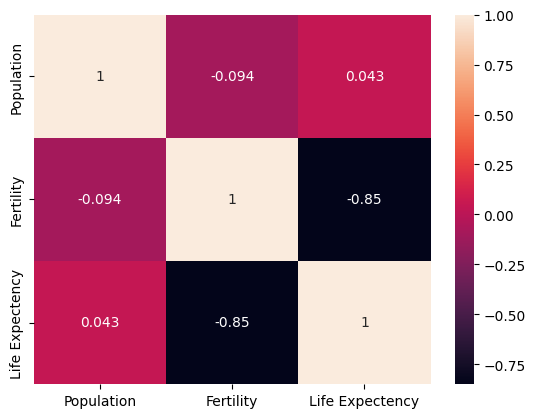

In [138]:


# Calculate the correlation between population, fertility, and life expectancy
corr_matrix = final_dataset.corr()
corr_matrix
# Visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.show()



**Population Comparison Among Regions**

In [147]:
fig = px.bar(
    data_frame=final_dataset,
    x='Region',
    y='Population',
    color='Region',
    template='plotly_dark',
    title='Population Comparison Among Regions',
    labels={'population': 'Population'},
)

# Update layout
fig.update_layout(
    xaxis_title='Region',
    yaxis_title='Population',
)

# Show the plot
fig.show()

Animated Motion graph

In [161]:

final_dataset['Population'].fillna(0,inplace=True)
fig = px.scatter(data_frame = final_dataset,
                 x='Fertility',
                 y='Life Expectency',
                 size='Population',
                 size_max=50,
                 color='Country Code',
                 range_x=[0.5, 9.5],
                 range_y=[30, 90],
                 hover_name='Country Code',
                 animation_frame='Year',
                 animation_group='Country Code',
                  template='plotly_dark',height=600)
fig.update_layout(title='Life Span 1960 - 2016',
                  xaxis_title='Fertility Rate - Total [Births per Woman]',
                  yaxis_title='Life Expectancy at Birth - Total')
fig.show()


In [ ]:
Population By region

In [176]:


final_dataset['Population'].fillna(0,inplace=True)
fig = px.pie(data_frame=final_dataset,
             values='Population',
             names='Region',
             title='Population by Region',
             template='plotly_dark',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()
